# Image classification สำหรับจำเเนกประเภทนกเเก้วสายพันธุ์คอนัวร์
โดยใช้ Convolutional Neural Network (CNN) ในการสร้างโมเดล

In [43]:
%pip install datasets
%pip install matplotlib
%pip install torch
%pip install torchvision
%pip install os
%pip install scikit-learn

ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


# Download Datasets
ได้ทำการหา dataset จากเเหล่งข้อมูลต่างๆ เเล้วทำการลง github เพื่อให้สามารถดาวน์โหลดมาใช้งานได้

โดยมีการเเบ่งชุดข้อมูลเเบบ 80 | 20 ได้เเก่
* Train set = 80%
* Test set = 10%
* Validation set = 10%


อย่างละ 11 Class
* กำหนด Train set      -> Class ละ 40 รูป รวมทั้งหมด 440 รูป
* กำหนด Test set       -> Class ละ 5 รูป  รวมทั้งหมด 55 รูป
* กำหนด Validation set -> Class ละ 5 รูป  รวมทั้งหมด 55 รูป


In [44]:
%pip install git+https://github.com/Berubell9/AI_ImageClassification_CNN_Parrot_Conure.git
!git clone https://github.com/Berubell9/AI_ImageClassification_CNN_Parrot_Conure.git

  Cloning https://github.com/Berubell9/AI_ImageClassification_CNN_Parrot_Conure.git to /tmp/pip-req-build-po2v3124
  Running command git clone --filter=blob:none --quiet https://github.com/Berubell9/AI_ImageClassification_CNN_Parrot_Conure.git /tmp/pip-req-build-po2v3124
  Resolved https://github.com/Berubell9/AI_ImageClassification_CNN_Parrot_Conure.git to commit 33a53d45919d1a0dde72d3992b537cef6200e438
ERROR: git+https://github.com/Berubell9/AI_ImageClassification_CNN_Parrot_Conure.git does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.
fatal: destination path 'AI_ImageClassification_CNN_Parrot_Conure' already exists and is not an empty directory.


# Import library

In [45]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from fastai.vision.all import *
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns

# เข้าถึงข้อมูล Datasets
กำหนด **Path** ที่ได้มาจาก Github เพื่อเข้าถึงโฟลเดอร์ Train set ,Test set เเละValidation set ใน Dataset

`os.path.join()` = รวม path

In [46]:
data_path = 'AI_ImageClassification_CNN_Parrot_Conure/data'
train_path = os.path.join(data_path, 'Train')
val_path = os.path.join(data_path, 'Validation')
test_path = os.path.join(data_path, 'Test')

In [47]:
print(f"Path ไปยังโฟลเดอร์ Train set : {train_path}")
print(f"Path ไปยังโฟลเดอร์ Test set : {test_path}")
print(f"Path ไปยังโฟลเดอร์ Validation set : {val_path}")

Path ไปยังโฟลเดอร์ Train set : AI_ImageClassification_CNN_Parrot_Conure/data/Train
Path ไปยังโฟลเดอร์ Test set : AI_ImageClassification_CNN_Parrot_Conure/data/Test
Path ไปยังโฟลเดอร์ Validation set : AI_ImageClassification_CNN_Parrot_Conure/data/Validation


# ตรวจสอบว่าในโฟลเดอร์ Train set ,Test set เเละValidation set มีกี่ class เเละมี Class อะไรบ้าง
`os.listdir()` = ดึงรายชื่อไฟล์ หรือโฟลเดอร์ทั้งหมดที่อยู่ภายใน Directory ของ Path ที่กำหนด

In [48]:
train_classes = os.listdir(train_path)
test_classes = os.listdir(test_path)
val_classes = os.listdir(val_path)

### เเสดงจำนวนข้อมูล Class ใน Train set ,Test set เเละValidation set ทั้งหมด

มีทั้งหมด 11 Class ได้เเก่

1. Sun conure
2. Blue Cinnamon Greencheek
3. Blue Pineapple Greencheek
4. Blue Yellow sided Greencheek
5. Blue Normal Greencheek
6. Black capped conure
7. Normal Greencheek
8. Yellow sided Greencheek
9. Pineapple Greencheek
10. Cinnamon Greencheek
11. Crimson bellird counre

In [49]:
print("Length of train classes :", len(train_classes))
print("Length of test classes :", len(test_classes))
print("Length of validation classes :", len(val_classes))

Length of train classes : 11
Length of test classes : 11
Length of validation classes : 11


In [50]:
print(f"Train Classes: {train_classes}")
print(f"Test Classes: {test_classes}")
print(f"Validation Classes: {val_classes}")

Train Classes: ['Blue Cinnamon Greencheek', 'Cinnamon Greencheek', 'Normal Greencheek', 'Black capped conure', 'Blue Yellow sided Greencheek', 'Pineapple Greencheek', 'Blue Pineapple Greencheek', 'Sun conure', 'Yellow sided Greencheek', 'Blue Normal Greencheek', 'Crimson bellird counre']
Test Classes: ['Blue Cinnamon Greencheek', 'Cinnamon Greencheek', 'Normal Greencheek', 'Black capped conure', 'Blue Yellow sided Greencheek', 'Pineapple Greencheek', 'Blue Pineapple Greencheek', 'Sun conure', 'Yellow sided Greencheek', 'Blue Normal Greencheek', 'Crimson bellird counre']
Validation Classes: ['Blue Cinnamon Greencheek', 'Cinnamon Greencheek', 'Normal Greencheek', 'Black capped conure', 'Blue Yellow sided Greencheek', 'Pineapple Greencheek', 'Blue Pineapple Greencheek', 'Sun conure', 'Yellow sided Greencheek', 'Blue Normal Greencheek', 'Crimson bellird counre']


# แสดงภาพตัวอย่าง เเละรายชื่อไฟล์รูปของ Train set ในแต่ละ class

Class: Blue Cinnamon Greencheek, Images: ['bcgc (23).jpg', 'bcgc (31).jpg', 'bcgc (38).jpg', 'bcgc (25).jpg', 'bcgc (14).jpg', 'bcgc (20).jpg', 'bcgc (8).jpg', 'bcgc (16).jpg', 'bcgc (11).jpg', 'bcgc (9).jpg', 'bcgc (13).jpg', 'bcgc (40).jpg', 'bcgc (3).jpg', 'bcgc (26).jpg', 'bcgc (36).jpg', 'bcgc (2).jpg', 'bcgc (19).jpg', 'bcgc (6).jpg', 'bcgc (28).jpg', 'bcgc (4).jpg', 'bcgc (21).jpg', 'bcgc (22).jpg', 'bcgc (7).jpg', 'bcgc (33).jpg', 'bcgc (18).jpg', 'bcgc (32).jpg', 'bcgc (30).jpg', 'bcgc (5).jpg', 'bcgc (10).jpg', 'bcgc (17).jpg', 'bcgc (1).jpg', 'bcgc (39).jpg', 'bcgc (15).jpg', 'bcgc (29).jpg', 'bcgc (12).jpg', 'bcgc (37).jpg', 'bcgc (24).jpg', 'bcgc (34).jpg', 'bcgc (27).jpg', 'bcgc (35).jpg']


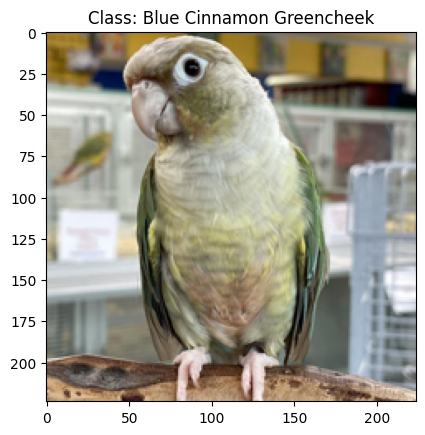

Class: Cinnamon Greencheek, Images: ['cgc (14).jpg', 'cgc (39).jpg', 'cgc (27).jpg', 'cgc (35).jpg', 'cgc (28).jpg', 'cgc (33).jpg', 'cgc (30).jpg', 'cgc (40).jpg', 'cgc (24).jpg', 'cgc (11).jpg', 'cgc (36).jpg', 'cgc (17).jpg', 'cgc (1).jpg', 'cgc (21).jpg', 'cgc (22).jpg', 'cgc (4).jpg', 'cgc (38).jpg', 'cgc (10).jpg', 'cgc (34).jpg', 'cgc (20).jpg', 'cgc (6).jpg', 'cgc (32).jpg', 'cgc (9).jpg', 'cgc (19).jpg', 'cgc (25).jpg', 'cgc (15).jpg', 'cgc (23).jpg', 'cgc (5).jpg', 'cgc (7).jpg', 'cgc (37).jpg', 'cgc (8).jpg', 'cgc (13).jpg', 'cgc (16).jpg', 'cgc (26).jpg', 'cgc (3).jpg', 'cgc (18).jpg', 'cgc (12).jpg', 'cgc (29).jpg', 'cgc (31).jpg', 'cgc (2).jpg']


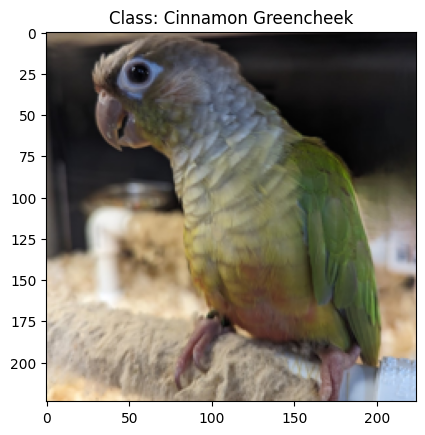

Class: Normal Greencheek, Images: ['ngc (13).jpg', 'ngc (14).jpg', 'ngc (16).jpg', 'ngc (38).jpg', 'ngc (27).jpg', 'ngc (40).jpg', 'ngc (1).jpg', 'ngc (4).jpg', 'ngc (25).jpg', 'ngc (28).jpg', 'ngc (37).jpg', 'ngc (3).jpg', 'ngc (33).jpg', 'ngc (32).jpg', 'ngc (26).jpg', 'ngc (22).jpg', 'ngc (2).jpg', 'ngc (31).jpg', 'ngc (19).jpg', 'ngc (30).jpg', 'ngc (20).jpg', 'ngc (12).jpg', 'ngc (24).jpg', 'ngc (11).jpg', 'ngc (23).jpg', 'ngc (29).jpg', 'ngc (39).jpg', 'ngc (36).jpg', 'ngc (10).jpg', 'ngc (34).jpg', 'ngc (8).jpg', 'ngc (15).jpg', 'ngc (21).jpg', 'ngc (7).jpg', 'ngc (5).jpg', 'ngc (18).jpg', 'ngc (17).jpg', 'ngc (6).jpg', 'ngc (35).jpg', 'ngc (9).jpg']


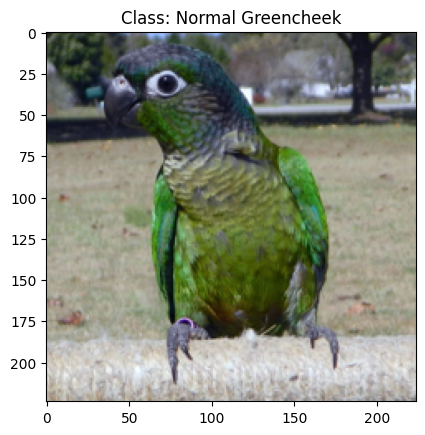

Class: Black capped conure, Images: ['bcc (39).jpg', 'bcc (10).jpg', 'bcc (31).jpg', 'bcc (3).jpg', 'bcc (1).jpg', 'bcc (2).jpg', 'bcc (35).jpg', 'bcc (32).jpg', 'bcc (17).jpg', 'bcc (37).jpg', 'bcc (14).jpg', 'bcc (16).jpg', 'bcc (34).jpg', 'bcc (13).jpg', 'bcc (15).jpg', 'bcc (20).jpg', 'bcc (6).jpg', 'bcc (8).jpg', 'bcc (18).jpg', 'bcc (33).jpg', 'bcc (30).jpg', 'bcc (23).jpg', 'bcc (27).jpg', 'bcc (29).jpg', 'bcc (7).jpg', 'bcc (28).jpg', 'bcc (38).jpg', 'bcc (24).jpg', 'bcc (36).jpg', 'bcc (12).jpg', 'bcc (40).jpg', 'bcc (25).jpg', 'bcc (26).jpg', 'bcc (11).jpg', 'bcc (5).jpg', 'bcc (22).jpg', 'bcc (19).jpg', 'bcc (21).jpg', 'bcc (9).jpg', 'bcc (4).jpg']


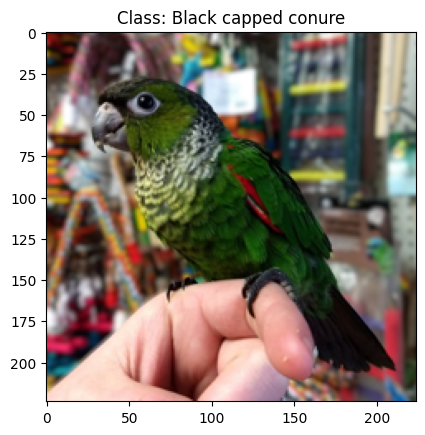

Class: Blue Yellow sided Greencheek, Images: ['bysgc (3).jpg', 'bysgc (6).jpg', 'bysgc (35).jpg', 'bysgc (15).jpg', 'bysgc (7).jpg', 'bysgc (36).jpg', 'bysgc (24).jpg', 'bysgc (29).jpg', 'bysgc (21).jpg', 'bysgc (8).jpg', 'bysgc (32).jpg', 'bysgc (22).jpg', 'bysgc (4).jpg', 'bysgc (39).jpg', 'bysgc (30).jpg', 'bysgc (14).jpg', 'bysgc (23).jpg', 'bysgc (12).jpg', 'bysgc (27).jpg', 'bysgc (5).jpg', 'bysgc (38).jpg', 'bysgc (34).jpg', 'bysgc (1).jpg', 'bysgc (20).jpg', 'bysgc (13).jpg', 'bysgc (26).jpg', 'bysgc (16).jpg', 'bysgc (33).jpg', 'bysgc (9).jpg', 'bysgc (28).jpg', 'bysgc (40).jpg', 'bysgc (11).jpg', 'bysgc (18).jpg', 'bysgc (37).jpg', 'bysgc (25).jpg', 'bysgc (31).jpg', 'bysgc (2).jpg', 'bysgc (10).jpg', 'bysgc (19).jpg', 'bysgc (17).jpg']


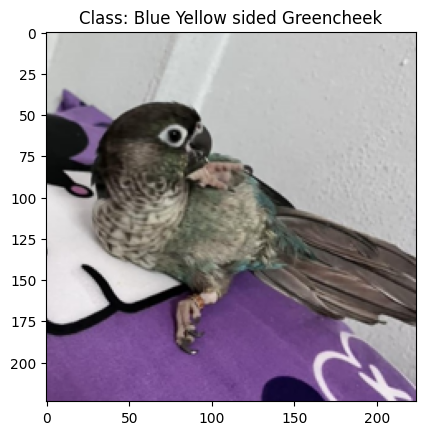

Class: Pineapple Greencheek, Images: ['pgc (38).jpg', 'pgc (35).jpg', 'pgc (26).jpg', 'pgc (31).jpg', 'pgc (5).jpg', 'pgc (34).jpg', 'pgc (8).jpg', 'pgc (29).jpg', 'pgc (30).jpg', 'pgc (15).jpg', 'pgc (2).jpg', 'pgc (4).jpg', 'pgc (20).jpg', 'pgc (12).jpg', 'pgc (14).jpg', 'pgc (3).jpg', 'pgc (6).jpg', 'pgc (9).jpg', 'pgc (24).jpg', 'pgc (1).jpg', 'pgc (16).jpg', 'pgc (25).jpg', 'pgc (23).jpg', 'pgc (37).jpg', 'pgc (19).jpg', 'pgc (11).jpg', 'pgc (32).jpg', 'pgc (27).jpg', 'pgc (13).jpg', 'pgc (28).jpg', 'pgc (22).jpg', 'pgc (21).jpg', 'pgc (17).jpg', 'pgc (18).jpg', 'pgc (36).jpg', 'pgc (33).jpg', 'pgc (39).jpg', 'pgc (40).jpg', 'pgc (7).jpg', 'pgc (10).jpg']


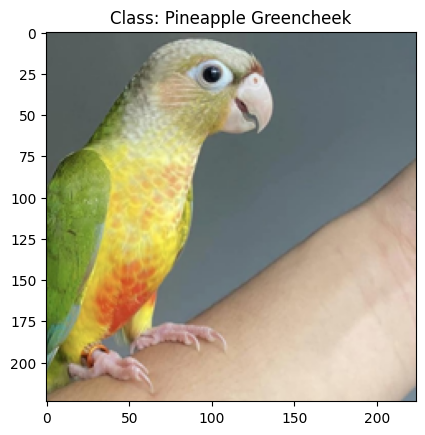

Class: Blue Pineapple Greencheek, Images: ['bpgc (9).jpg', 'bpgc (8).jpg', 'bpgc (5).jpg', 'bpgc (27).jpg', 'bpgc (20).jpg', 'bpgc (23).jpg', 'bpgc (24).jpg', 'bpgc (19).jpg', 'bpgc (16).jpg', 'bpgc (11).jpg', 'bpgc (4).jpg', 'bpgc (39).jpg', 'bpgc (25).jpg', 'bpgc (2).jpg', 'bpgc (21).jpg', 'bpgc (30).jpg', 'bpgc (28).jpg', 'bpgc (26).jpg', 'bpgc (13).jpg', 'bpgc (29).jpg', 'bpgc (3).jpg', 'bpgc (37).jpg', 'bpgc (31).jpg', 'bpgc (6).jpg', 'bpgc (12).jpg', 'bpgc (33).jpg', 'bpgc (10).jpg', 'bpgc (14).jpg', 'bpgc (1).jpg', 'bpgc (35).jpg', 'bpgc (22).jpg', 'bpgc (34).jpg', 'bpgc (18).jpg', 'bpgc (36).jpg', 'bpgc (40).jpg', 'bpgc (32).jpg', 'bpgc (38).jpg', 'bpgc (17).jpg', 'bpgc (15).jpg', 'bpgc (7).jpg']


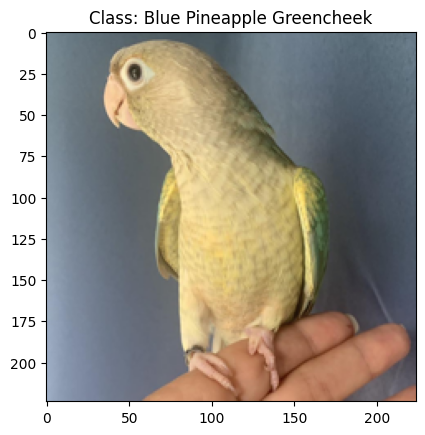

Class: Sun conure, Images: ['sc (27).jpg', 'sc (36).jpg', 'sc (24).jpg', 'sc (4).jpg', 'sc (12).jpg', 'sc (23).jpg', 'sc (31).jpg', 'sc (21).jpg', 'sc (10).jpg', 'sc (28).jpg', 'sc (14).jpg', 'sc (18).jpg', 'sc (37).jpg', 'sc (7).jpg', 'sc (5).jpg', 'sc (35).jpg', 'sc (38).jpg', 'sc (39).jpg', 'sc (16).jpg', 'sc (1).jpg', 'sc (9).jpg', 'sc (26).jpg', 'sc (30).jpg', 'sc (3).jpg', 'sc (6).jpg', 'sc (13).jpg', 'sc (29).jpg', 'sc (33).jpg', 'sc (40).jpg', 'sc (20).jpg', 'sc (19).jpg', 'sc (2).jpg', 'sc (34).jpg', 'sc (22).jpg', 'sc (8).jpg', 'sc (32).jpg', 'sc (11).jpg', 'sc (15).jpg', 'sc (25).jpg', 'sc (17).jpg']


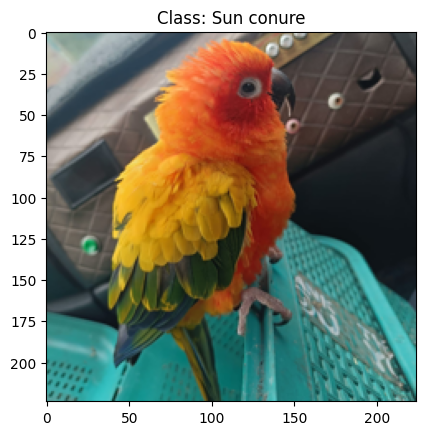

Class: Yellow sided Greencheek, Images: ['ysgc (31).jpg', 'ysgc (12).jpg', 'ysgc (35).jpg', 'ysgc (30).jpg', 'ysgc (28).jpg', 'ysgc (38).jpg', 'ysgc (32).jpg', 'ysgc (7).jpg', 'ysgc (21).jpg', 'ysgc (29).jpg', 'ysgc (6).jpg', 'ysgc (23).jpg', 'ysgc (27).jpg', 'ysgc (17).jpg', 'ysgc (25).jpg', 'ysgc (39).jpg', 'ysgc (5).jpg', 'ysgc (10).jpg', 'ysgc (4).jpg', 'ysgc (22).jpg', 'ysgc (11).jpg', 'ysgc (2).jpg', 'ysgc (14).jpg', 'ysgc (16).jpg', 'ysgc (15).jpg', 'ysgc (19).jpg', 'ysgc (9).jpg', 'ysgc (13).jpg', 'ysgc (33).jpg', 'ysgc (18).jpg', 'ysgc (40).jpg', 'ysgc (20).jpg', 'ysgc (37).jpg', 'ysgc (3).jpg', 'ysgc (26).jpg', 'ysgc (24).jpg', 'ysgc (36).jpg', 'ysgc (1).jpg', 'ysgc (34).jpg', 'ysgc (8).jpg']


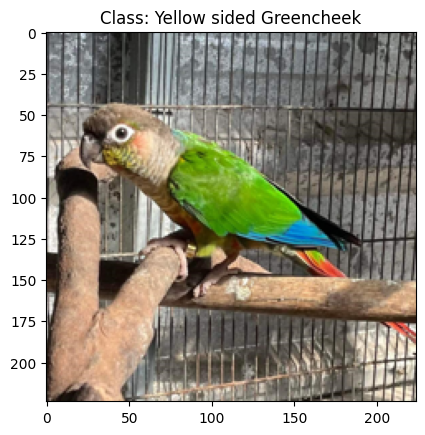

Class: Blue Normal Greencheek, Images: ['bngc (27).jpg', 'bngc (6).jpg', 'bngc (9).jpg', 'bngc (33).jpg', 'bngc (21).jpg', 'bngc (17).jpg', 'bngc (1).jpg', 'bngc (2).jpg', 'bngc (7).jpg', 'bngc (10).jpg', 'bngc (35).jpg', 'bngc (22).jpg', 'bngc (28).jpg', 'bngc (25).jpg', 'bngc (37).jpg', 'bngc (39).jpg', 'bngc (29).jpg', 'bngc (34).jpg', 'bngc (40).jpg', 'bngc (16).jpg', 'bngc (36).jpg', 'bngc (30).jpg', 'bngc (31).jpg', 'bngc (11).jpg', 'bngc (15).jpg', 'bngc (26).jpg', 'bngc (5).jpg', 'bngc (14).jpg', 'bngc (12).jpg', 'bngc (3).jpg', 'bngc (38).jpg', 'bngc (20).jpg', 'bngc (8).jpg', 'bngc (13).jpg', 'bngc (19).jpg', 'bngc (23).jpg', 'bngc (4).jpg', 'bngc (32).jpg', 'bngc (18).jpg', 'bngc (24).jpg']


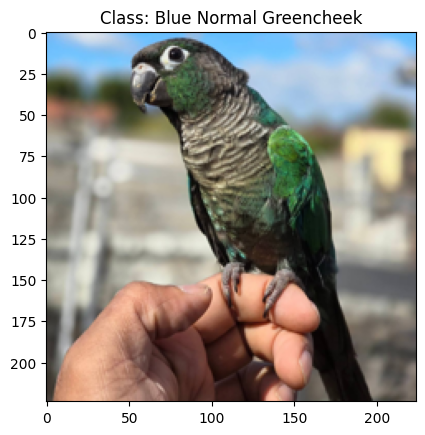

Class: Crimson bellird counre, Images: ['cbc (33).jpg', 'cbc (39).jpg', 'cbc (21).jpg', 'cbc (9).jpg', 'cbc (3).jpg', 'cbc (30).jpg', 'cbc (28).jpg', 'cbc (29).jpg', 'cbc (19).jpg', 'cbc (27).jpg', 'cbc (12).jpg', 'cbc (31).jpg', 'cbc (5).jpg', 'cbc (40).jpg', 'cbc (37).jpg', 'cbc (1).jpg', 'cbc (23).jpg', 'cbc (16).jpg', 'cbc (14).jpg', 'cbc (35).jpg', 'cbc (34).jpg', 'cbc (15).jpg', 'cbc (24).jpg', 'cbc (22).jpg', 'cbc (18).jpg', 'cbc (6).jpg', 'cbc (13).jpg', 'cbc (10).jpg', 'cbc (4).jpg', 'cbc (26).jpg', 'cbc (36).jpg', 'cbc (7).jpg', 'cbc (25).jpg', 'cbc (20).jpg', 'cbc (38).jpg', 'cbc (8).jpg', 'cbc (17).jpg', 'cbc (2).jpg', 'cbc (11).jpg', 'cbc (32).jpg']


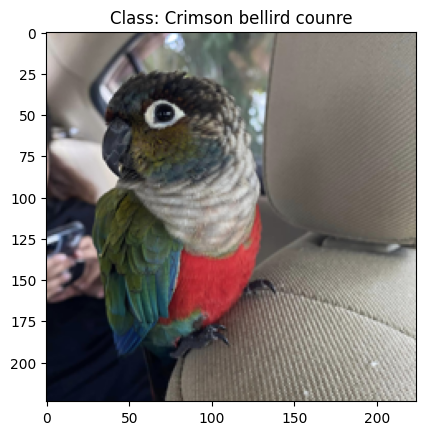

In [51]:
for class_name in train_classes:
    # Path ไปยังโฟลเดอร์ย่อยของแต่ละ class
    class_path = os.path.join(train_path, class_name)

    # รายการรูปภาพในแต่ละ class
    images = os.listdir(class_path)

    # ตรวจสอบว่ามีภาพในโฟลเดอร์ไหม
    if images:

        # แสดงชื่อไฟล์ทั้งหมดในโฟลเดอร์
        print(f"Class: {class_name}, Images: {images}")

        # แสดงภาพตัวอย่างภาพเเรกจาก class นั้น
        img_path = os.path.join(class_path, images[0])
        img = Image.open(img_path)

        # resize ภาพให้เป็นขนาด 224 x 224
        img = img.resize((224, 224))

        # แสดงภาพ
        plt.imshow(img)
        plt.title(f"Class: {class_name}")
        plt.show()

# Data augmentation

เพิ่มจำนวนข้อมูล เเละความหลากหลายของข้อมูลใน Train set ,Test set เเละValidation set


### Data transform = แปลงภาพจากข้อมูลเดิมใน Train set ,Test set เเละValidation set

`'ชื่อชุดข้อมูล': transforms.Compose([กำหนดสิ่งที่ต้องการจะเเปลงในภาพ])` = แปลงชุดข้อมูล Train set ,Test set เเละValidation set ก่อนนำไปใช้ในโมเดล

In [52]:
data_transforms = {
    'Train': transforms.Compose([
        transforms.RandomResizedCrop(size = 224, scale = (0.8, 1.0)),                 # ครอบภาพแบบสุ่มโดยขนาดสุดท้ายคือ 224x224 และสเกลอยู่ระหว่าง 80% ถึง 100% ของขนาดดั้งเดิม
        transforms.RandomRotation(degrees = 15),                                      # หมุนภาพแบบสุ่มโดยองศาการหมุนอยู่ในช่วง ±15 องศา
        transforms.RandomHorizontalFlip(),                                            # พลิกภาพในแนวนอนแบบสุ่ม
        transforms.CenterCrop(size = 224),                                            # ครอบภาพตรงกลางให้ได้ขนาด 224x224
        transforms.ToTensor(),                                                        # แปลงภาพเป็น tensor (รูปแบบข้อมูลที่โมเดลสามารถใช้งานได้)
        transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))   # ทำ Normalization
    ]),
    'Validation': transforms.Compose([
        transforms.Resize(size = 224),                                                # ครอบขนาดภาพเป็น 224x224
        transforms.CenterCrop(size = 224),
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
    ]),
    'Test': transforms.Compose([
        transforms.Resize(size = 224),
        transforms.CenterCrop(size = 224),
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
    ]),
}

# Data loader

โหลดข้อมูลจาก dataset

`datasets.ImageFolder(path ,transforms)` = โหลดภาพจากโฟลเดอร์ที่มีการกำหนด Path พร้อมกับ transforms หรือแปลงข้อมูล



In [53]:
train_dataset = datasets.ImageFolder(train_path, data_transforms['Train'])
val_dataset = datasets.ImageFolder(val_path, data_transforms['Validation'])
test_dataset = datasets.ImageFolder(test_path, data_transforms['Test'])

`DataLoader(ชื่อชุดข้อมูล, batch_size, shuffle)` = โหลดข้อมูลจาก dataset

* batch size = จำนวนข้อมูลที่ถูกป้อนให้กับโมเดลในแต่ละรอบการฝึก (iteration) **โดยกำหนดขนาดไว้ 32**

* shuffle = สุ่มลำดับของข้อมูลในการตรวจสอบ
  1. False = ไม่สุ่ม
  2. True = สุ่ม

In [54]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

### เเสดงจำนวนข้อมูลใน Train set ,Test set เเละValidation set ทั้งหมด

In [55]:
print("Length of train data :", len(train_dataset))
print("Length of validation data :", len(val_dataset))
print("Length of test data :", len(test_dataset))

Length of train data : 440
Length of validation data : 55
Length of test data : 55


### เเสดงขนาดข้อมูลใน Train set

In [56]:
# การดึง batch ของภาพ
images, labels = next(iter(train_loader))

# แปลงภาพเป็นรูปแบบ NumPy สำหรับการแสดงผล
images = images.numpy()

# ตรวจสอบขนาดของ batch
print(images.shape, labels.shape)

(32, 3, 224, 224) torch.Size([32])


# เเสดงภาพตัวอย่างหลังจาก Transforms

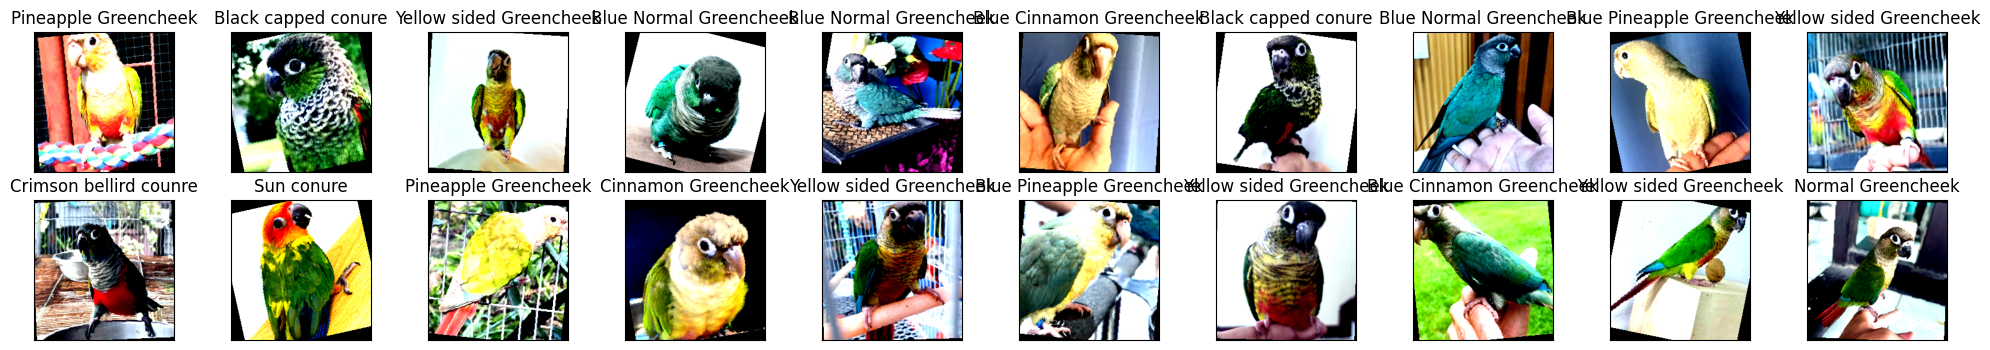

In [57]:
def imshow(img):
    img = img / 2 + 0.5                       # Unnormalize ปรับค่าให้กลับไปอยู่ในช่วง [0, 1]
    plt.imshow(np.transpose(img, (1, 2, 0)))  # แปลงจาก Tensor เป็นรูปแบบ HWC เพื่อแสดงผล

# ดึงรายการชื่อ Class จาก Train set
classes = train_dataset.classes

# สร้างรูปภาพใหม่ โดยตั้งค่าขนาดเป็น 25x4 นิ้ว
fig = plt.figure(figsize=(25, 4))

# วนลูปเพื่อแสดงภาพ 20 รูป
for idx in np.arange(20):

    # สร้าง subplot ขนาด 2 แถว 10 คอลัมน์ โดยแต่ละภาพจะถูกจัดในแต่ละตำแหน่ง (idx + 1)
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])

    # แสดงภาพที่ตำแหน่ง idx
    imshow(images[idx])
    # ตั้งชื่อ subplot ตามชื่อ Class ที่มีรูปกับชื่อให้ตรงกัน
    ax.set_title(classes[labels[idx]])

# CNN Model
โครงสร้างของ CNN ที่ใช้ในการเทรน
## Layer 1
* ### Convolutional Layer 1 (conv1)

  เลเยอร์นี้รับข้อมูลนำเข้าที่มี 3 ช่อง (RGB color channels) และใช้การดำเนินการ Convolution กับฟิลเตอร์ 12 ตัว เเต่ละตัวขนาด 3x3 มี Stride คือ 1 เเละPadding คือ 1
  
  ซึ่งหมายความว่าการดำเนินการ Convolution จะถูกนำไปใช้กับพิกเซลทั้งหมดในข้อมูลนำเข้า และผลลัพธ์จะมีความกว้าง และความสูงเท่ากับข้อมูลนำเข้า

* ### Batch Normalization Layer 1 (bn1)

  เลเยอร์นี้ทำการปรับค่าของผลลัพธ์จากเลเยอร์ Convolution แรกโดยการทำ Normalization
  
  ซึ่งช่วยปรับปรุงประสิทธิภาพของเครือข่ายโดยการลดการเปลี่ยนแปลงในการกระจายของข้อมูลนำเข้าระหว่างเลเยอร์

* ### ReLU Activation Layer 1 (relu1)

  เลเยอร์นี้ใช้ฟังก์ชันการเปิดใช้งาน ReLU (Rectified Linear Unit) กับผลลัพธ์จากเลเยอร์ Batch normalization
  
  ฟังก์ชัน ReLU นี้ช่วยแนะนำความไม่เป็นเชิงเส้น (Non-linearity) เข้าสู่เครือข่าย

* ### Max Pooling Layer (pool)

  เลเยอร์นี้ย่อขนาดภาพทั้งความกว้าง และสูงของข้อมูลนำเข้า
  โดยการเลือกค่าที่มากที่สุดขนาด 2x2
  
  ซึ่งช่วยลดจำนวนพารามิเตอร์ในเครือข่าย และควบคุมการเกิด overfitting


---

## Layer 2

* ### Convolutional Layer 2 (conv2)

  เลเยอร์นี้ใช้การดำเนินการ Convolution กับฟิลเตอร์ 20 ตัว แต่ละตัวมีขนาด 3x3 กับผลลัพธ์จากเลเยอร์ Max pooling ค่า stride คือ 1 และ padding คือ 1

* ### ReLU Activation Layer 2 (relu2)

  เลเยอร์นี้ใช้ฟังก์ชันการเปิดใช้งาน ReLU กับผลลัพธ์จากเลเยอร์ Convolution ที่สอง


---



## Layer 3

* ### Convolutional Layer 3 (conv3)

  เลเยอร์นี้ใช้การดำเนินการ Convolution กับฟิลเตอร์ 32 ตัว แต่ละตัวมีขนาด 3x3 กับผลลัพธ์จากเลเยอร์ ReLU ของเลเยอร์ Convolution ที่สอง

* ### Batch Normalization Layer 3 (bn3)

  เลเยอร์นี้ทำการปรับค่าของผลลัพธ์จากเลเยอ Convolution ที่สามโดยการทำ Normalization

* ### ReLU Activation Layer 3 (relu3)

  เลเยอร์นี้ใช้ฟังก์ชันการเปิดใช้งาน ReLU กับผลลัพธ์จากเลเยอร์ Normalization ของเลเยอร์ Convolution ที่สาม


---



## Fully Connected Layer

* ### Fully Connected Layer 1 (fc1)

  เลเยอร์นี้ทำการแปลงผลลัพธ์จากเลเยอร์ ReLU ของเลเยอร์ Convolution ที่สามให้เป็น Tensor 1 มิติ และทำการแปลงเชิงเส้น มีจำนวนฟีเจอร์ออกมาเป็น 120

* ### Fully Connected Layer 2 (fc2)

  เลเยอร์นี้ทำการแปลงเชิงเส้นกับผลลัพธ์จากเลเยอร์ Fully connected แรก จำนวนฟีเจอร์ออกมาจะเท่ากับจำนวน Class ในงานการจำแนกประเภท


---

## Forward function
กำหนดลำดับการส่งข้อมูลผ่านเลเยอร์ต่างๆ ซึ่งผลลัพธ์สุดท้ายจะเป็นการทำนาย Class ของข้อมูลนำเข้า



In [58]:
class CNN_Model(nn.Module):
    def __init__(self, num_classes = 11):
        super(CNN_Model, self).__init__()

        # Layer 1 -> ขนาด = (32, 3, 224, 224) -> ขนาด = (32, 12, 224, 224)
        # 32 คือขนาดของ batch, 12 คือจำนวนฟิลเตอร์, 224x224 คือขนาดของภาพ
        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 12, kernel_size=3, stride = 1, padding = 1)
        self.bn1 = nn.BatchNorm2d(num_features = 12)
        self.relu1 = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size = 2)

        # Layer 2 -> ขนาด = (32, 12, 112, 112) -> ขนาด = (32, 20, 112, 112)
        self.conv2 = nn.Conv2d(in_channels = 12, out_channels = 20, kernel_size = 3, stride = 1, padding = 1)
        self.relu2 = nn.ReLU()

        # Layer 3 -> ขนาด = (32, 20, 112, 112) -> ขนาด = (32, 32, 112, 112)
        self.conv3 = nn.Conv2d(in_channels = 20, out_channels = 32, kernel_size = 3, stride = 1, padding = 1)
        self.bn3 = nn.BatchNorm2d(num_features=32)
        self.relu3 = nn.ReLU()

        # Fully Connected Layers
        # Fully connected layer แรก -> ขนาด = (32, 32, 112, 112) -> ขนาด = (32, 120)
        self.fc1 = nn.Linear(in_features = 112*112*32, out_features = 120)
        #Fully connected layer สอง -> ขนาด = (32, 120) -> ขนาด = (32, 11)
        self.fc2 = nn.Linear(in_features = 120, out_features = num_classes)

    def forward(self, input):
        output = self.conv1(input)    # ส่งผ่านเลเยอร์ convolution แรก
        output = self.bn1(output)     # ส่งผ่าน Batch Normalization แรก
        output = self.relu1(output)   # ส่งผ่านฟังก์ชัน ReLU แรก
        output = self.pool(output)    # ส่งผ่าน Max Pooling

        output = self.conv2(output)   # ส่งผ่านเลเยอร์ convolution ที่สอง
        output = self.relu2(output)   # ส่งผ่านฟังก์ชัน ReLU ที่สอง

        output = self.conv3(output)   # ส่งผ่านเลเยอร์ convolution ที่สาม
        output = self.bn3(output)     # ส่งผ่าน Batch Normalization ที่สาม
        output = self.relu3(output)   # ส่งผ่านฟังก์ชัน ReLU ที่สาม

        # ผลลัพธ์จะอยู่ในรูปแบบของเมทริกซ์ โดยมีรูปทรง (32, 32, 112, 112)
        output = output.view(-1, 112*112*32)  # แปลงข้อมูลเป็นเวกเตอร์ 1 มิติ

        output = F.relu(self.fc1(output))     # ส่งผ่าน Fully Connected Layer แรก
        output = self.fc2(output)             # ส่งผ่าน Fully Connected Layer สอง
        return output                         # คืนค่าผลลัพธ์สุดท้าย

### แสดงรายละเอียดของโมเดล

In [59]:
model = CNN_Model()
model

CNN_Model(
  (conv1): Conv2d(3, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(12, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (conv3): Conv2d(20, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (fc1): Linear(in_features=401408, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=11, bias=True)
)

# ตรวจสอบ GPU
ตรวจสอบว่าเครื่องที่ใช้อยู่มี GPU ที่รองรับการ Train ไหม

ถ้ามี GPU ก็จะย้ายโมเดลไป Train บน GPU แต่ถ้าไม่มีก็จะ Train บน CPU แทน

In [60]:
train_on_gpu = torch.cuda.is_available()

if train_on_gpu:
    model.cuda()
    print('Training on GPU.')
else:
    print('Training on CPU.')

Training on CPU.


# ทดลองหาค่า Lerning Rate ที่เหมาะสม

Number of training batches: 13
Number of validation batches: 2
Image batch shape: torch.Size([32, 3, 224, 224]), Label batch shape: torch.Size([32])


SuggestedLRs(valley=0.0012022644514217973)

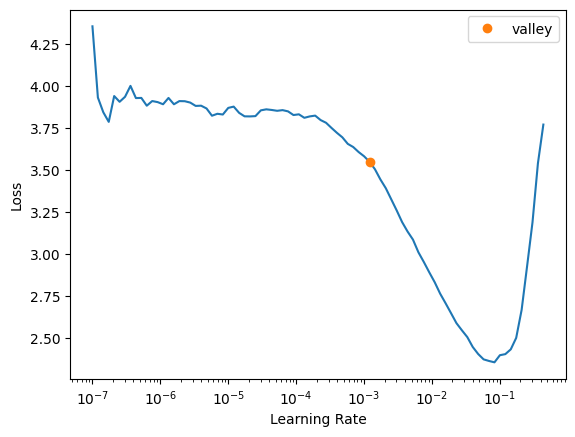

In [61]:
# กำหนด path ของชุดข้อมูล (เปลี่ยนเป็นที่อยู่จริงของคุณ)
data_path = Path('AI_ImageClassification_CNN_Parrot_Conure/data')

# สร้าง DataLoader จากโฟลเดอร์
dls = ImageDataLoaders.from_folder(data_path,
                                    train='Train',
                                    valid='Validation',
                                    size=224,       # ขนาดภาพ
                                    bs=32,          # batch size
                                    item_tfms=Resize(224))  # ใช้ item_tfms แทน after_item

# ตรวจสอบจำนวน batch ใน DataLoader
print(f"Number of training batches: {len(dls.train)}")
print(f"Number of validation batches: {len(dls.valid)}")

# ดูภาพตัวอย่าง
x, y = dls.train.one_batch()
print(f"Image batch shape: {x.shape}, Label batch shape: {y.shape}")

# สร้าง Learner
learner = cnn_learner(dls, resnet34, metrics=[error_rate, accuracy])

# หา Learning Rate ที่เหมาะสม
learner.lr_find()

# กำหนดตัวปรับแต่งเพื่อลดค่า Loss ของโมเดล (Optimizer)
ปรับค่าอัตราการเรียนรู้ (Learning rate) = 0.001 (นิยม)

In [62]:
optimizer = optim.SGD(model.parameters(), lr=0.001)

# กำหนดฟังก์ชันการคำนวณค่า Loss ของโมเดล (Loss Function)

In [63]:
criterion = nn.CrossEntropyLoss()

# Train Model
* Train model ด้วย Convolutional Neural Network (CNN) ที่สร้างไว้ ด้วยชุดข้อมูล Training set และทำการตรวจสอบผลด้วยชุดข้อมูล Validation set
* กำหนดจำนวน Epoch ในการวนลูปเพื่อ Train model และทำการประเมินค่า Loss และAccuracy
* บันทึกโมเดลที่ให้ผลลัพธ์ดีที่สุด
* เก็บประวัติค่า Loss และAccuracy เพื่อนำไปทำกราฟต่อ


In [64]:
num_epochs = 5        # จำนวน epoch ที่ต้องการเทรน
best_accuracy = 0.0   # ค่า accuracy ที่ดีที่สุดในการทดสอบ

# เก็บประวัติของค่า Loss และ Accuracy
history = {
    'train_loss': [],
    'valid_loss': [],
    'train_accuracy': [],
    'valid_accuracy': []
}

for epoch in range(1, num_epochs + 1):

    ############ Training Phase ############

    model.train()       # ตั้งโมเดลให้อยู่ในโหมดเทรน
    train_loss = 0.0    # ตัวแปรสะสมค่า loss สำหรับชุดเทรน
    correct_train = 0   # ตัวแปรนับจำนวนที่ทำนายถูกต้องในชุดเทรน

    # วนลูปเทรนข้อมูลใน train_loader
    for images, target in train_loader:

        # ย้ายข้อมูลไปที่ GPU ถ้ามี
        if train_on_gpu:
            images, target = images.cuda(), target.cuda()

        optimizer.zero_grad()   # ล้างค่า gradient ก่อนเริ่มการคำนวณใหม่
        outputs = model(images) # คำนวณผลลัพธ์จากโมเดล

        loss = criterion(outputs, target) # คำนวณค่า loss โดยเปรียบเทียบผลลัพธ์ที่คาดการณ์กับค่าจริง
        loss.backward()                   # คำนวณ gradient จาก loss
        optimizer.step()                  # ปรับพารามิเตอร์ของโมเดลตาม gradient

        train_loss += loss.item() * images.size(0)                   # สะสมค่า loss
        correct_train += (outputs.argmax(1) == target).sum().item()  # นับจำนวนที่ทำนายถูก

    train_loss /= len(train_loader.dataset)                     # คำนวณค่า loss เฉลี่ยในชุดเทรน
    train_accuracy = correct_train / len(train_loader.dataset)  # คำนวณค่า accuracy เฉลี่ย

    ############ Validation Phase ############

    model.eval()        # ตั้งโมเดลให้อยู่ในโหมดทดสอบ
    valid_loss = 0.0    # ตัวแปรสะสมค่า loss สำหรับชุด validation
    correct_valid = 0   # ตัวแปรนับจำนวนที่ทำนายถูกต้องในชุด validation

    # ปิดการคำนวณ gradient ในระหว่างการตรวจสอบ
    with torch.no_grad():

        # วนลูปตรวจสอบข้อมูลใน val_loader
        for images, target in val_loader:
          # ย้ายข้อมูลไปที่ GPU ถ้ามี
          if train_on_gpu:
              images, target = images.cuda(), target.cuda()

          outputs = model(images)  # คำนวณผลลัพธ์จากโมเดล

          valid_loss += criterion(outputs, target).item() * images.size(0)  # สะสมค่า loss
          correct_valid += (outputs.argmax(1) == target).sum().item()       # นับจำนวนที่ทำนายถูก

    valid_loss /= len(val_loader.dataset)                     # คำนวณค่า loss เฉลี่ยในชุด validation
    valid_accuracy = correct_valid / len(val_loader.dataset)  # คำนวณค่า accuracy เฉลี่ยในชุด validation

    ############ Logging and Model Saving ############

    # แสดงผลลัพธ์ในแต่ละ epoch
    print(f'Epoch: {epoch} \tTrain Accuracy: {train_accuracy:.6f} \tTrain Loss: {train_loss:.6f} \tValidation Accuracy: {valid_accuracy:.6f} \tValidation Loss: {valid_loss:.6f}')

    # เก็บข้อมูล loss และ accuracy
    history['train_loss'].append(train_loss)
    history['valid_loss'].append(valid_loss)
    history['train_accuracy'].append(train_accuracy)
    history['valid_accuracy'].append(valid_accuracy)

    # บันทึกโมเดลที่มีค่า accuracy ทดสอบดีที่สุด
    if valid_accuracy > best_accuracy:                     # ตรวจสอบว่าค่า accuracy ของชุด validation ดีกว่าค่าที่ดีที่สุดที่บันทึกไว้หรือไม่
        torch.save(model.state_dict(), 'modelNomal_5.pt')  # บันทึกสถานะของโมเดล
        best_accuracy = valid_accuracy                     # อัปเดตค่า accuracy ที่ดีที่สุด

Epoch: 1 	Train Accuracy: 0.197727 	Train Loss: 2.304191 	Validation Accuracy: 0.200000 	Validation Loss: 2.334303
Epoch: 2 	Train Accuracy: 0.288636 	Train Loss: 2.076055 	Validation Accuracy: 0.272727 	Validation Loss: 2.175937
Epoch: 3 	Train Accuracy: 0.361364 	Train Loss: 1.827160 	Validation Accuracy: 0.418182 	Validation Loss: 1.918882
Epoch: 4 	Train Accuracy: 0.434091 	Train Loss: 1.642241 	Validation Accuracy: 0.381818 	Validation Loss: 1.791674
Epoch: 5 	Train Accuracy: 0.456818 	Train Loss: 1.559169 	Validation Accuracy: 0.400000 	Validation Loss: 1.743133


### โมเดลที่ถูกสร้าง และเทรนแล้วสามารถนำกลับมาใช้งานต่อได้ โดยไม่ต้องทำการเทรนใหม่ตั้งแต่ต้นอีกครั้ง

`torch.load('ชื่อไฟล์.pt')` = เปิดไฟล์ที่เก็บโมเดล และโหลดน้ำหนักของโมเดลกลับมาในหน่วยความจำ

`model.load_state_dict(...)` = นำข้อมูลที่โหลดมา (ซึ่งเป็นน้ำหนักของโมเดล) ไปกำหนดให้กับโมเดลที่กำหนดไว้ในตัวแปร model ทำให้โมเดลนั้นมีน้ำหนักตามที่บันทึกไว้ในไฟล์


In [65]:
model.load_state_dict(torch.load('modelNomal_5.pt'))

<ipython-input-65-cb4036d15b50>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('modelNomal_5.pt'))


<All keys matched successfully>

# Test Model

In [72]:
############ Test Phase ############

test_loss = 0.0   # ตัวแปรสะสมค่า loss สำหรับชุดทดสอบ
correct_test = 0  # ตัวแปรนับจำนวนที่ทำนายถูกต้องในชุดทดสอบ
class_correct = list(0. for i in range(11))  # เก็บจำนวนที่ทำนายถูกต้องสำหรับแต่ละคลาส
class_total = list(0. for i in range(11))     # เก็บจำนวนตัวอย่างทั้งหมดสำหรับแต่ละคลาส

all_images = []
all_labels = []
all_preds = []

# ปิดการคำนวณ gradient ในระหว่างการทดสอบ
with torch.no_grad():

    # วนลูปทดสอบข้อมูลใน test_loader
    for images, labels in test_loader:

        # ย้ายภาพและ labels ไปที่ GPU ถ้ามี
        if train_on_gpu:
            images, labels = images.cuda(), labels.cuda()

        outputs = model(images) # ส่งภาพเข้าโมเดลเพื่อคาดการณ์

        test_loss += criterion(outputs, labels).item() * images.size(0) # สะสมค่า Loss
        correct_test += (outputs.argmax(1) == labels).sum().item()      # นับจำนวนที่ทำนายถูก

        # เปลี่ยนค่าความน่าจะเป็นเป็นคลาสที่คาดการณ์
        _, preds_tensor = torch.max(outputs, 1)
        preds = np.squeeze(preds_tensor.cpu().numpy()) if train_on_gpu else np.squeeze(preds_tensor.numpy())

        all_images.extend(images.cpu().numpy())   # ย้ายภาพกลับไปยัง CPU และเก็บไว้
        all_labels.extend(labels.cpu().numpy())   # ย้าย labels กลับไปยัง CPU และเก็บไว้
        all_preds.extend(preds)                   # เก็บค่าการคาดการณ์

        # สะสมความแม่นยำสำหรับแต่ละ class
        for i in range(images.size(0)):   # วนลูปผ่านแต่ละตัวอย่างใน batch
            label = labels.data[i]        # ดึง label ของตัวอย่าง
            class_correct[label] += (outputs.argmax(1)[i] == label).item()  # ถ้าทำนายถูก
            class_total[label] += 1       # เพิ่มจำนวนตัวอย่างในคลาสนี้

test_loss /= len(test_loader.dataset)                    # คำนวณค่า loss เฉลี่ยในชุดทดสอบ
test_accuracy = correct_test / len(test_loader.dataset)  # คำนวณค่า accuracy เฉลี่ยในชุดทดสอบ

### แสดงผลความแม่นยำของแต่ละ Class
ดูว่าเเต่ละ Class มีความเเม่นยำกี่เปอร์เซ็น เเละถูกกี่รูป

In [73]:
# วนลูปผ่านแต่ละคลาส (มี 11 คลาส)
for i in range(11):

    # ตรวจสอบว่ามีตัวอย่างในคลาสนี้หรือไม่
    if class_total[i] > 0:

        # แสดงความแม่นยำของคลาส
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],  # คำนวณและแสดงความแม่นยำ
            int(class_correct[i]), int(class_total[i])))          # แสดงจำนวนที่ทำนายถูกและจำนวนตัวอย่างทั้งหมด

    # หากไม่มีตัวอย่างในคลาสนี้ จะแสดงข้อความว่าไม่มีข้อมูล
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

# แสดงผลความแม่นยำโดยรวม (Overall Accuracy)
print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),     # คำนวณและแสดงความแม่นยำรวม
    int(np.sum(class_correct)), int(np.sum(class_total))))  # แสดงจำนวนที่ทำนายถูกและจำนวนตัวอย่างทั้งหมด

Test Accuracy of Black capped conure: 60% ( 3/ 5)
Test Accuracy of Blue Cinnamon Greencheek: 20% ( 1/ 5)
Test Accuracy of Blue Normal Greencheek: 60% ( 3/ 5)
Test Accuracy of Blue Pineapple Greencheek:  0% ( 0/ 5)
Test Accuracy of Blue Yellow sided Greencheek:  0% ( 0/ 5)
Test Accuracy of Cinnamon Greencheek:  0% ( 0/ 5)
Test Accuracy of Crimson bellird counre: 40% ( 2/ 5)
Test Accuracy of Normal Greencheek:  0% ( 0/ 5)
Test Accuracy of Pineapple Greencheek: 80% ( 4/ 5)
Test Accuracy of Sun conure: 60% ( 3/ 5)
Test Accuracy of Yellow sided Greencheek:  0% ( 0/ 5)

Test Accuracy (Overall): 29% (16/55)


### Confusion Matrix
ประเมินประสิทธิภาพของโมเดล เพื่อดูว่าเเต่ละ Class ทำนายเป็นอะไรบ้าง

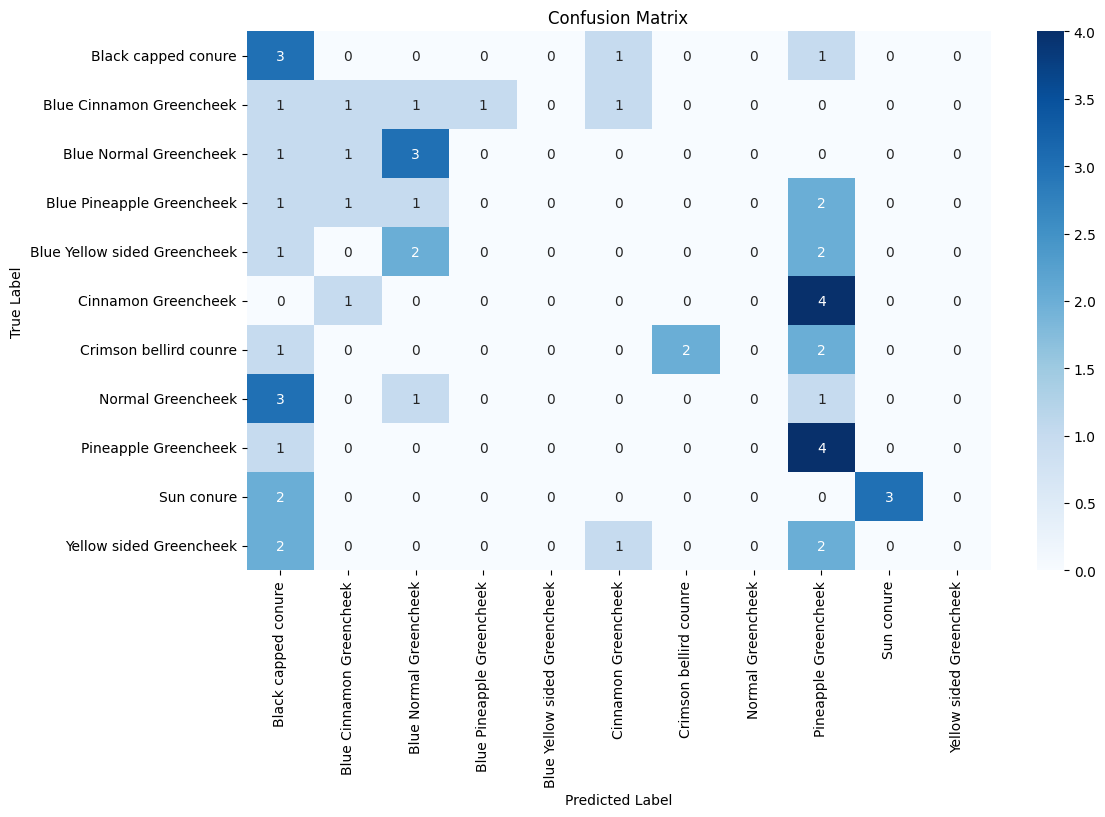

In [74]:
# คำนวณ Confusion Matrix
cfm = confusion_matrix(all_labels, all_preds, labels=np.unique(all_labels))

# แสดงผล Confusion Matrix
df_cm = pd.DataFrame(cfm, index=[i for i in classes], columns=[i for i in classes])
plt.figure(figsize=(12, 7))
sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### แสดงผลภาพพร้อมการคาดการณ์ผลการทำนาย
วนลูปจำนวนภาพที่จะทำการแสดง ทั้งหมด  55 รูป ใน Test set

ดูภาพที่ทำนายถูกผิดได้จากสี Class

*   สีเขียว = ทำนายถูก
*   สีแดง = ทำนายผิด

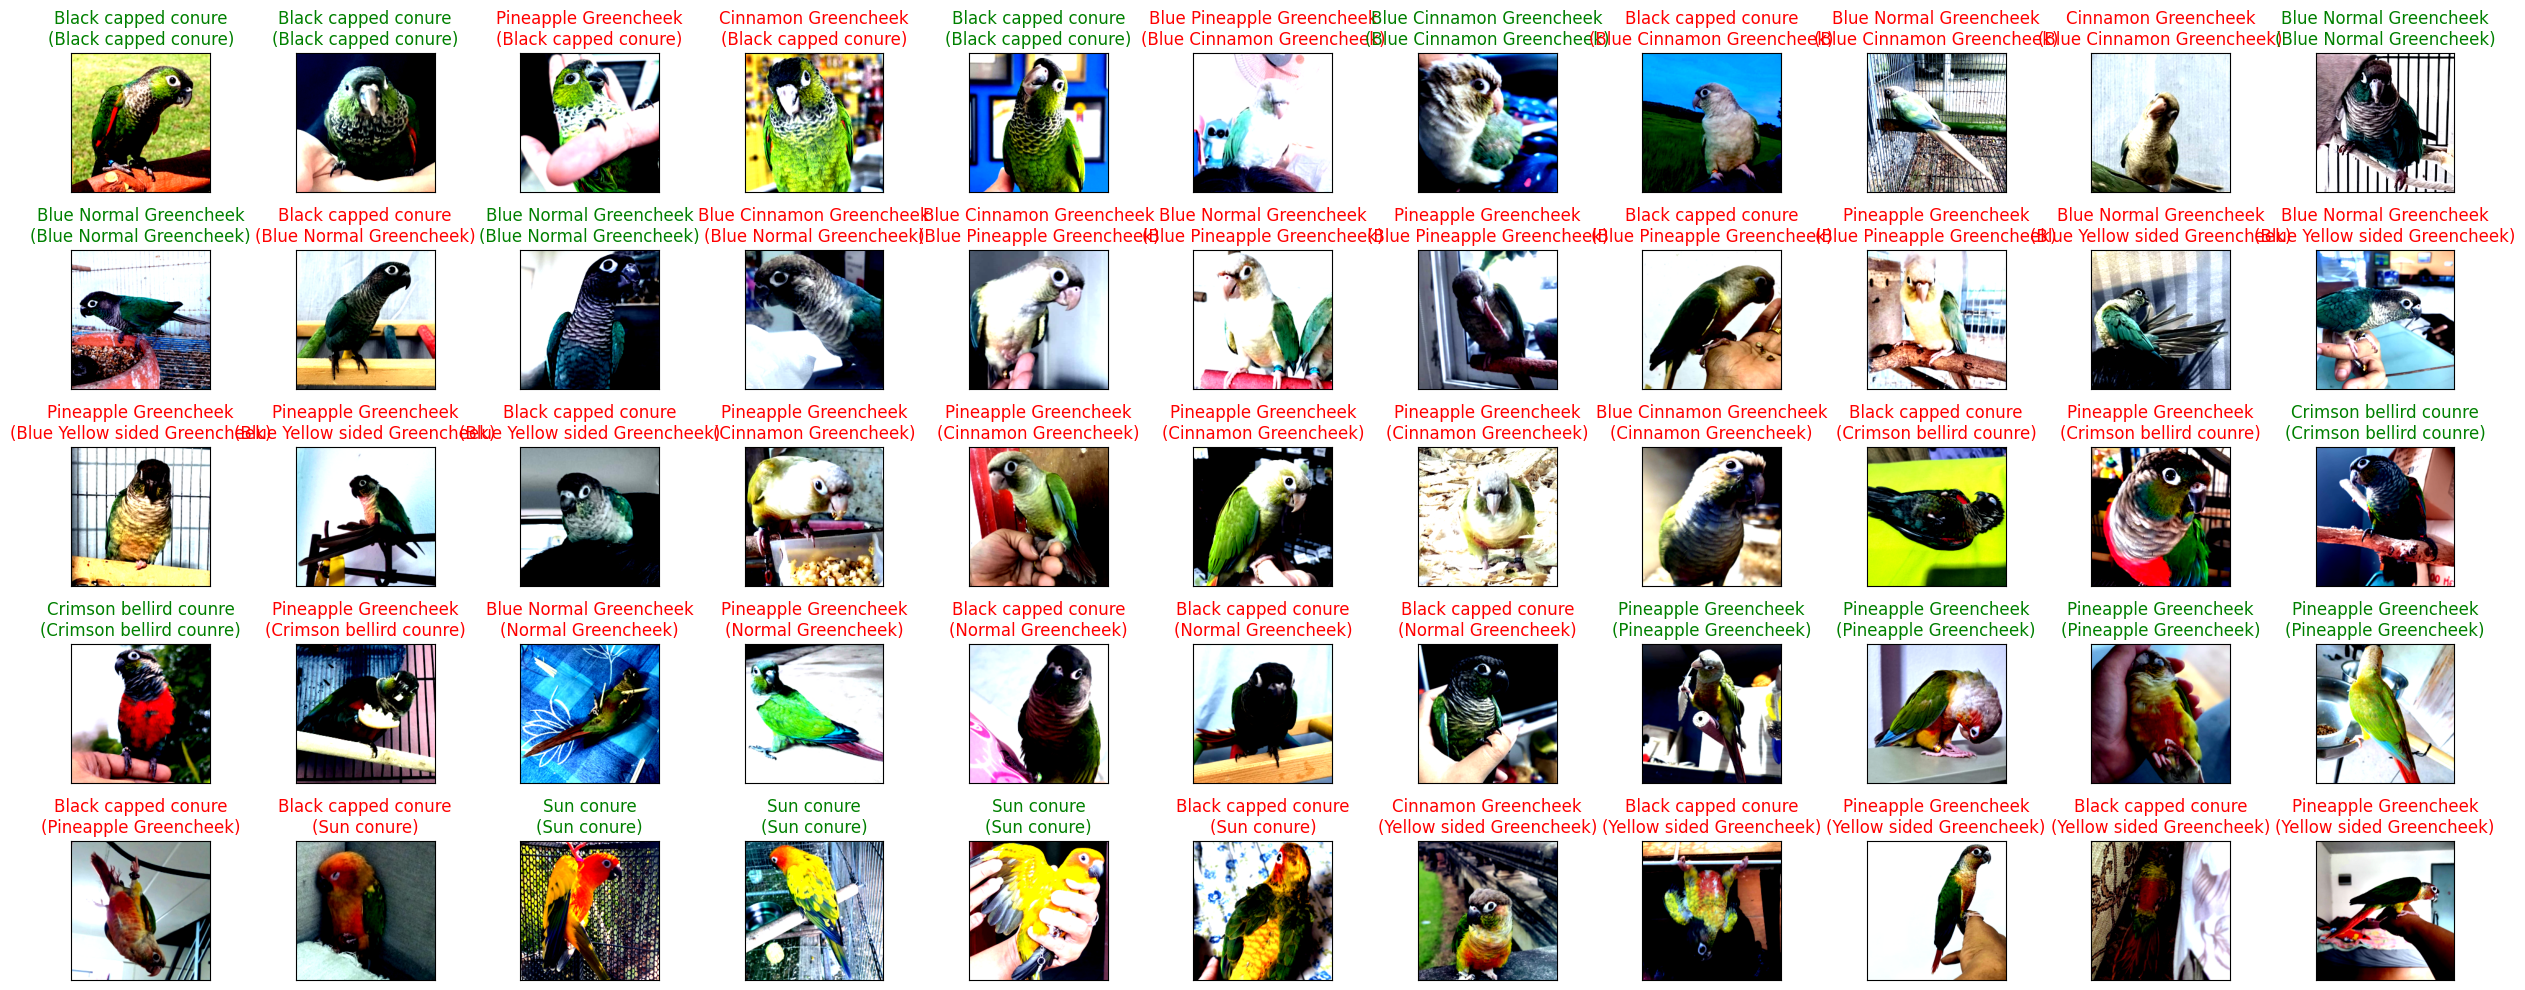

In [75]:
fig = plt.figure(figsize=(25, 10))
for idx in range(55):
    # เเบ่งเป็น 5 เเถว เเถวละ 11 รูป
    ax = fig.add_subplot(5, 11, idx + 1, xticks=[], yticks=[])

    # แสดงภาพใน test set ใช้ฟังก์ชัน imshow
    imshow(all_images[idx])

    # ตั้งชื่อภาพตามการคาดการณ์
    ax.set_title("{}\n({})".format(classes[all_preds[idx]], classes[all_labels[idx]]),
                 color=("green" if all_preds[idx] == all_labels[idx] else "red"))

plt.tight_layout()
plt.show()

# กราฟประวัติค่า Loss และAccuracy

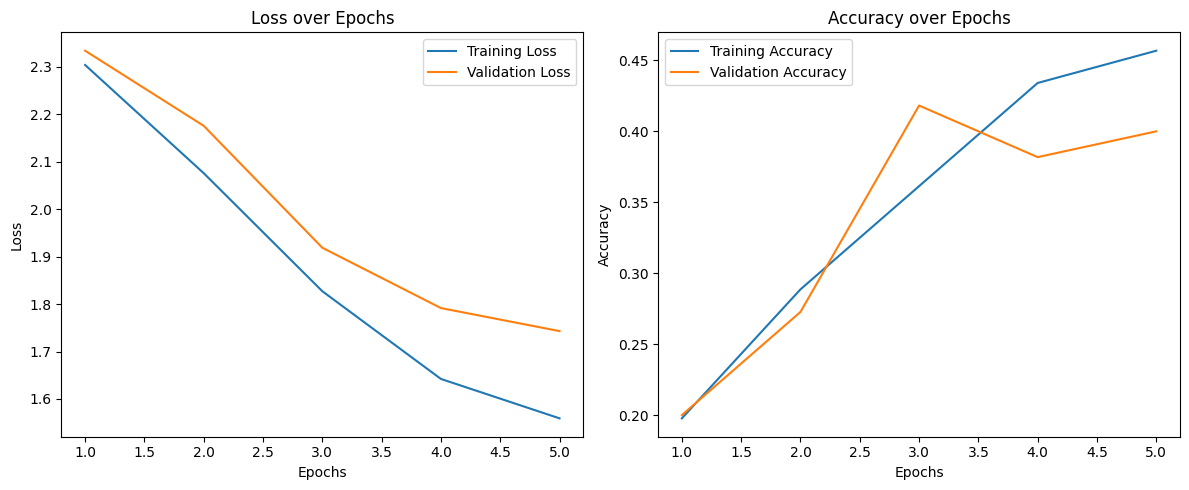

In [76]:
epochs = range(1, num_epochs + 1)
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(epochs, history['train_loss'], label='Training Loss')
plt.plot(epochs, history['valid_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, history['train_accuracy'], label='Training Accuracy')
plt.plot(epochs, history['valid_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# สรุปผล
1. เนื่องจากมีจำนานข้อมูลใน Train set ,Test set เเละValidation set ปริมาณที่น้อย
  ผลคือทำให้ค่า Loss มาก ,ค่า Accurancy น้อย เเละผลจากการทำนายโดยใช้ Test set ยังมีบาง Class ที่ทายไม่ถูกทั้งหมดอยู่

  **เเก้ไขปัญหา** = ทำ **Data augmentation** เพื่อเพิ่มปริมาณของข้อมูลในชุดข้อมูล

2. โมเดล CNN ที่สร้างขึ้นมาเองยังมีประสิทธิภาพไม่ดีมากพอในการนำไป Train
  
  **เเก้ไขปัญหา** = ใช้ **Resnet 50** ในการทำโมเดล จากการทดลองเทรนพบว่าประสิทธิภาพของค่า Loss น้อยลง ,ค่า Accurancy เพิ่มขึ้น เเละผลจากการทำนายโดยใช้ Test set ในเเต่ละ Class ทายถูกมากขึ้น

ค่ามาตรฐานที่ตั้งไว้

* Batch size = 32
* Lerning Rate = 0.001

### ใช้โมเดล CNN ที่สร้างขึ้นมาเอง
  * ผลจากการ Train โดยปรับ Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)) จะช่วยเพิ่มประสิทธิภาพของโมเดล เเละสามารถทำให้โมเดลทำนาย Test set ถูกได้มากกว่า Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
  * ค่า Lerning Rate ที่เหมาะสมสำหรับการ Train ในครั้งนี้ คือ 0.001
  * จำนวนรอบ Epoch ที่เหมาะสมประมาณไม่เกิน 100 Epoch ถ้ามากกว่านี้เสี่ยงต่อการ Overfiting ได้

รวมผลการ Train : https://www.notion.so/CNN-11b43a38c84a80538b4ed6f3ff359d8a



### ใช้ Resnet 50
(ผลดีผลลัพธ์ดีกว่าโมเดล CNN ที่สร้างขึ้นมาเอง)
* ผลจากการ Train โดยปรับ Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)) พบว่าประสิทธิภาพของโมเดล เเละการทำนาย Test set นั้นถูกได้น้อยกว่า Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
* ค่า Lerning Rate ที่เหมาะสมสำหรับการ Train ในครั้งนี้ คือ 0.001
* จำนวนรอบ Epoch ที่เหมาะสมประมาณไม่เกิน 150 Epoch ถ้ามากกว่านี้เสี่ยงต่อการ Overfiting ได้

รวมผลการ Train : https://www.notion.so/Resnet-50-11b43a38c84a80b6b2cde6bb79440819

In [70]:
# โหลดโมเดล ResNet-50 ที่ pretrained
model = models.resnet50(pretrained=True)

# Freeze เลเยอร์ทั้งหมด ยกเว้น fully connected layer
for param in model.parameters():
    param.requires_grad = False

# เปลี่ยน fully connected layer สำหรับการทำนายคลาสใหม่
num_classes = 11
model.fc = torch.nn.Linear(model.fc.in_features, num_classes)

# ย้ายโมเดลไปยังอุปกรณ์ (GPU ถ้ามี หรือ CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)


# อ้างอิง :

1.  https://medium.com/@fikretoulus/pytorch-image-classification-cnn-basics-and-transfer-learning-cad2439be84d
2. [deep-learning-v2-pytorch/convolutional-neural-networks/cifar-cnn/cifar10_cnn_solution.ipynb](https://github.com/udacity/deep-learning-v2-pytorch/blob/master/convolutional-neural-networks/cifar-cnn/cifar10_cnn_solution.ipynb)
3. [CNN Model With PyTorch For Image Classification | by Pranjal Soni | TheCyPhy | Medium](https://medium.com/thecyphy/train-cnn-model-with-pytorch-21dafb918f48)